# 라벨 되어있는 txt파일 EDA

### 파일 전처리

In [1]:
import os
import cv2

In [2]:
# txt 파일 개수 확인
txt_ls = os.listdir('./dataset/annotations/')
len(txt_ls)

2180

In [3]:
# 이미지 파일 개수 확인
img_ls = os.listdir('./dataset/images/')
len(img_ls)

2180

In [4]:
# 원본 이미지 파일 개수 확인
org_img = os.listdir('./images/')
len(org_img)

2507

위 결과를 확인 해보면 학습후 이미지의 개수가 줄어든걸로 확인된다. 그러면 실제 있는 이미지 파일 개수랑 txt 파일 비교해서 있으면 사용하고 없으면 txt파일 삭제

In [5]:
# 이미지 파일에서 확장자 제거
img_ext = []

for _ in img_ls:
    img_ext.append(_.split('.')[0])

# txt 파일에서 확장자 제거
txt_ext = []

for _ in txt_ls:
    txt_ext.append(_.split('.')[0])

In [6]:
# 삭제 해야할 파일의 개수 파악
for img in img_ext:
    txt_ext.remove(img)

len(txt_ext)

0

In [7]:
# 필요없는 txt파일 삭제 <- 최초 한번 실행
drop_txt = []
for _ in txt_ext:
    drop_txt = _ + '.txt'
    os.remove(f'./dataset/annotations/{drop_txt}')
    print('삭제 완 ', drop_txt)

### txt 파일이용해서 데이터 EDA(객체의 분포도 확인)

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [9]:
# txt파일 경로
txt_ls = os.listdir('./dataset/annotations/')

# txt 파일 읽기
df_txt = []

pd.read_csv('./dataset/annotations/20180101_155236_INF_2-00000.txt', sep=' ',names=['class', 'w', 'h', 'center_x', 'center_y'])

,class,w,h,center_x,center_y
0,0,0.11402,0.49244,0.00986,0.05272
1,0,0.02973,0.51807,0.01004,0.06680
2,0,0.04823,0.50925,0.01383,0.06758
3,0,0.02269,0.51971,0.00931,0.06213
4,2,0.76351,0.53629,0.23986,0.24214
5,2,0.36168,0.49081,0.12759,0.14092
6,2,0.18597,0.49831,0.12392,0.11626
7,2,0.56491,0.45221,0.03752,0.04569
8,2,0.51447,0.44592,0.02496,0.03928


In [10]:
ontol = {
    "person": "person",
    "bicycle": "bicycle",
    'car' : 'car',
    'motorcycle' : 'motorcycle',
    'bus' : 'bus',
    'truck' : 'truck'
}

In [11]:
# txt파일 경로
txt_ls = os.listdir('./dataset/annotations/')

# txt 파일 읽기
df_txt = []
pd.read_csv('./dataset/annotations/20180101_155236_INF_2-00000.txt', sep=' ',names=['class', 'w', 'h', 'center_x', 'center_y'])

,class,w,h,center_x,center_y
0,0,0.11402,0.49244,0.00986,0.05272
1,0,0.02973,0.51807,0.01004,0.06680
2,0,0.04823,0.50925,0.01383,0.06758
3,0,0.02269,0.51971,0.00931,0.06213
4,2,0.76351,0.53629,0.23986,0.24214
5,2,0.36168,0.49081,0.12759,0.14092
6,2,0.18597,0.49831,0.12392,0.11626
7,2,0.56491,0.45221,0.03752,0.04569
8,2,0.51447,0.44592,0.02496,0.03928


In [12]:
total_txt = []

# txt파일 경로
txt_ls = os.listdir('./dataset/annotations/')

for _ in txt_ls:
    with open(f'./dataset/annotations/{_}', 'r', encoding='utf-8') as f:
        txt_org = f.readlines()
        total_txt = total_txt + txt_org


yolo_txt = []
for _ in total_txt:
    yolo_txt.append(_.split('\n')[0])

In [13]:
# 공백 분리
data = [row.split() for row in yolo_txt]
data[:5]

[['0', '0.11402', '0.49244', '0.00986', '0.05272'],
 ['0', '0.02973', '0.51807', '0.01004', '0.06680'],
 ['0', '0.04823', '0.50925', '0.01383', '0.06758'],
 ['0', '0.02269', '0.51971', '0.00931', '0.06213'],
 ['2', '0.76351', '0.53629', '0.23986', '0.24214']]

In [14]:
# 데이터 프레임 적제
df = pd.DataFrame(data, columns=['class', 'w', 'h', 'center_x', 'center_y'])
df

,class,w,h,center_x,center_y
0,0,0.11402,0.49244,0.00986,0.05272
1,0,0.02973,0.51807,0.01004,0.06680
2,0,0.04823,0.50925,0.01383,0.06758
3,0,0.02269,0.51971,0.00931,0.06213
4,2,0.76351,0.53629,0.23986,0.24214
...,...,...,...,...,...
16822,2,0.36786,0.47378,0.07087,0.08619
16823,2,0.30664,0.45957,0.06647,0.07964
16824,2,0.42631,0.45216,0.04752,0.05771
16825,4,0.54776,0.56318,0.24593,0.33108


In [15]:
# 데이터 개수 파악
df.shape

(16827, 5)

In [16]:
df.describe()

,class,w,h,center_x,center_y
count,16827,16827,16827,16827,16827
unique,6,14641,9173,9458,11753
top,2,0.49992,0.49930,0.01013,0.04044
freq,6376,23,11,12,7


In [17]:
df['class'].value_counts()

class
2    6376
0    5127
5    2130
4    1943
3     896
1     355
Name: count, dtype: int64

In [18]:
# 한글 폰트
plt.rc('font', family = 'Malgun Gothic') # window
plt.rc('font', size = 12)
plt.rc('axes', unicode_minus = False)

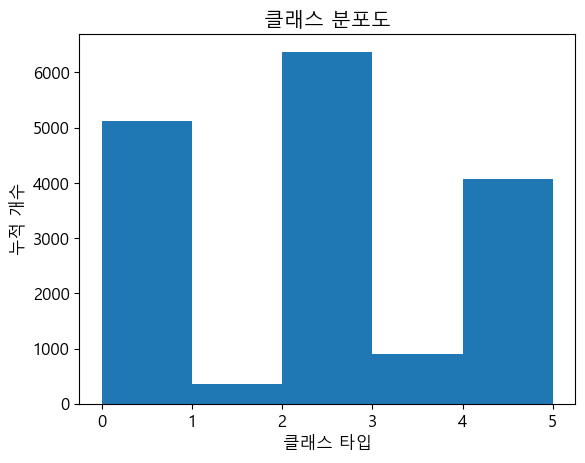

In [19]:
plt.hist(df['class'].sort_values(), df['class'].sort_values().unique())

plt.title('클래스 분포도')
plt.xlabel('클래스 타입')
plt.ylabel('누적 개수')

plt.show()

In [ ]:
ontol = {
    "person": "person",
    "bicycle": "bicycle",
    'car' : 'car',
    'motorcycle' : 'motorcycle',
    'bus' : 'bus',
    'truck' : 'truck'
}

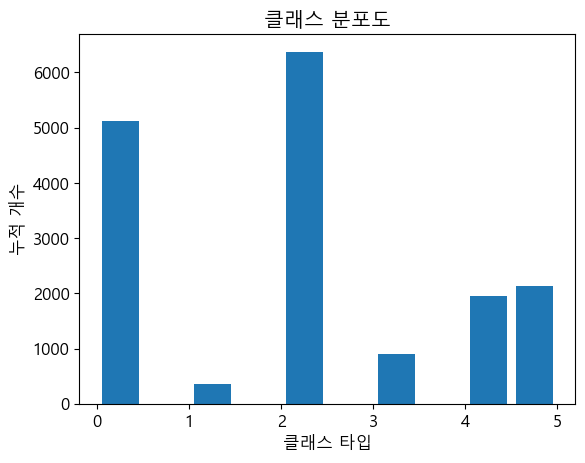

In [20]:
# plt.figure(figsize=(12,5))

plt.hist(df['class'].sort_values(), rwidth=0.8)

plt.title('클래스 분포도')
plt.xlabel('클래스 타입')
plt.ylabel('누적 개수')

plt.show()